<h1> Momento de Retroalimentación: Módulo 1
<h2> Utilización, procesamiento y visualización de grandes volúmenes de datos (Portafolio Análisis)

A01639224 | Fausto Alejandro Palma Cervantes

TC3007C.502 | Inteligencia artificial avanzada para la ciencia de datos II

31 de octubre de 2023

## Configuración del entorno de trabajo

Como parte del módulo *Big Data* se llevó a cabo la actividad *Momento de Retroalimentación: Módulo 1*, cuyo objetivo fue aprender del uso, procesamiento y visualización de grandes volúmenes de datos. Esta actividad se llevó a cabo utilizando Apache Spark, el cual es un framework de código abierto para el procesamiento y análisis de grandes volúmenes de datos.

Para utilizar este framework primero se instalaron e importaron los módulos y librerías necesarias:

*   Para la lectura de bases de datos se conectó el entorno de Colab a una unidad de Google Drive con los archivos seleccionados
*   Para la generación y evaluación de modelos se instaló PySpark, configuró una sesión de Spark e importaron los modelos seleccionados
*   Para la visualización de los resultados se importaron módulos para la creación de gráficos de las librerías Matplotlib y Seaborn

In [ ]:
# Conectar la unidad de Google Drive al entorno de Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalar los paquetes de PySpark necesarios
!pip install pyspark py4j

# Configurar una sesión de Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('A01639224_MomentoDeRetroalimentacion').getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=254e81d2b2aeee510bd26a57f61266d230a0f92e8d35ab447ad6eb52c6f7cf3e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Importar los modelos seleccionados
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.clustering import KMeans

# Importar herramientas de evaluación
from pyspark.ml.evaluation import ClusteringEvaluator

# Importar bibliotecas y módulos para la visualización
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Modelos y bases de datos

La implementación de los modelos y bases de datos seleccionadas se encontró en la documentación oficial de Apache Spark, la cual se puede observar en los siguientes enlaces:

*   Clasificación y regresión: https://spark.apache.org/docs/latest/ml-classification-regression.html#classification-and-regression
*   Agrupamiento: https://spark.apache.org/docs/latest/ml-clustering.html

Cabe mencionar que la documentación y estructura de la implementación de los modelos se actualizó para ser más descriptiva acorde al objetivo de esta actividad.

### Modelo de Clasificación
Modelo seleccionado: Binominal logistic regression

Base de datos seleccionada: 'sample_libsvm_data.txt'

In [ ]:
# GENERAR EL MODELO

# Leer el archivo con la base de datos seleccionada
training = spark.read.format("libsvm").load("/content/drive/MyDrive/zBig Data/sample_libsvm_data.txt")

# Definir y entrenar el modelo
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(training)

# Imprimir los coeficientes e intercepto de la regresión
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: (692,[272,300,323,350,351,378,379,405,406,407,428,433,434,435,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.520689871384125e-05,-8.115773146847006e-05,3.814692771846427e-05,0.0003776490540424338,0.0003405148366194403,0.0005514455157343107,0.0004085386116096912,0.0004197467332749452,0.0008119171358670031,0.000502770837266875,-2.3929260406600902e-05,0.0005745048020902297,0.0009037546426803677,7.818229700243899e-05,-2.1787551952911914e-05,-3.402165821789542e-05,0.0004966517360637633,0.0008190557828370372,-8.017982139522613e-05,-2.743169403783527e-05,0.0004810832226238988,0.0004840801762677878,-8.926472920009901e-06,-0.00034148812330427297,-8.950592574121382e-05,0.00048645469116892156,-8.478698005186097e-05,-0.00042347832158317705,-7.296535777631246e-05])
Intercept: -0.5991460286401438


In [ ]:
# EVALUAR SU DESEMPEÑO

# Obtener el resumen del entrenamiento del modelo
trainingSummary = lrModel.summary

# Imprimir la evolución del modelo durante su entrenamiento
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Imprimir la relación entre las tasas de los verdaderos y falsos positivos
print()
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Calcular el valor ópitmo de la precisión y el recall para ajustar el modelo
print()
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6833149135741672
0.6661906127558117
0.6207433672479603
0.6131541253123869
0.6059149689952393
0.5923656241678249
0.589823308283802
0.5868012627420282
0.5844432058719142
0.5830790068041746
0.5807015754032354

+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.017543859649122806|
|0.0| 0.03508771929824561|
|0.0| 0.05263157894736842|
|0.0| 0.07017543859649122|
|0.0| 0.08771929824561403|
|0.0| 0.10526315789473684|
|0.0| 0.12280701754385964|
|0.0| 0.14035087719298245|
|0.0| 0.15789473684210525|
|0.0| 0.17543859649122806|
|0.0| 0.19298245614035087|
|0.0| 0.21052631578947367|
|0.0| 0.22807017543859648|
|0.0| 0.24561403508771928|
|0.0|  0.2631578947368421|
|0.0|  0.2807017543859649|
|0.0|  0.2982456140350877|
|0.0|  0.3157894736842105|
|0.0|  0.3333333333333333|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 1.0



LogisticRegression_98952456c485

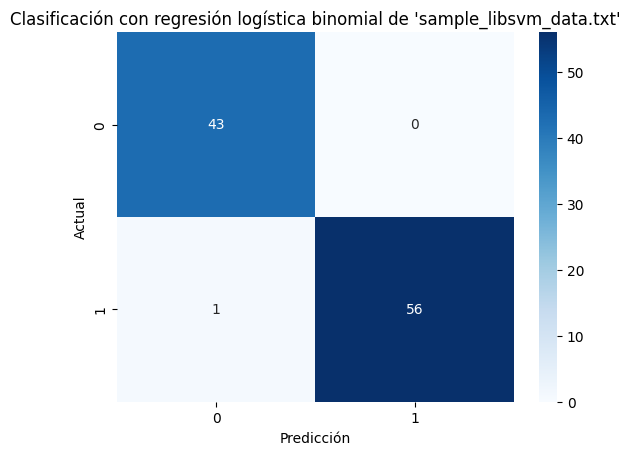

In [ ]:
# VISUALIZAR LOS RESULTADOS

# Predecir la clasificación de todos los datos
predictions = lrModel.transform(training)

# Crear listas para los valores actuales y las predicciones
actual = []
predicted = []

# Almacenar los valores en su arreglo correspondiente
for row in predictions.collect():
  actual.append(row[0])
  predicted.append(row[4])

# Crear una matriz de confusión
cm = confusion_matrix(actual, predicted)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Clasificación con regresión logística binomial de \'sample_libsvm_data.txt\'')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

### Modelo de regresión
Modelo seleccionado: Linear regression

Base de datos seleccionada: 'sample_linear_regression_data.txt'

In [ ]:
# GENERACIÓN

# Leer el archivo con la base de datos seleccionada
training = spark.read.format("libsvm").load("/content/drive/MyDrive/zBig Data/sample_linear_regression_data.txt")

# Definir y entrenar el modelo
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(training)

# Imprimir los coeficientes e intercepto de la regresión
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356


In [ ]:
# EVALUACIÓN

# Obtener el resumen del entrenamiento del modelo
trainingSummary = lrModel.summary

# Imprimir el número total de iteraciones que se realizaron durante el entrenamiento del modelo
print("numIterations: %d" % trainingSummary.totalIterations)

# Imprimir la evolución del modelo durante su entrenamiento
print()
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

# Imprimir los residuos del modelo
print()
trainingSummary.residuals.show()

# Imprimir el error cuadrático medio
print()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

# Imprimir el coeficiente de determinación
print()
print("r2: %f" % trainingSummary.r2)

numIterations: 6

objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]

+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows


RMSE: 10.189077

r2: 0.022861


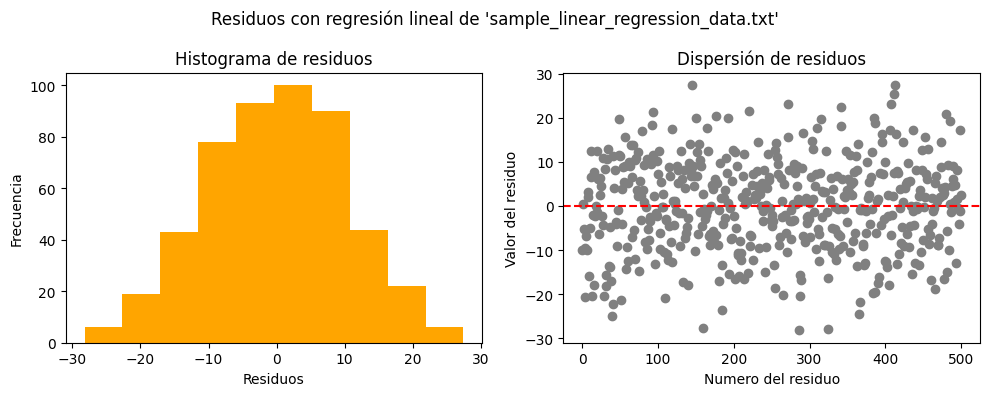

In [ ]:
# VISUALIZACIÓN

# Crear una lista para los residuos
residuals = []

# Almacenar los residuos en el arreglo correspondiente
for row in trainingSummary.residuals.collect():
  residuals.append(row[0])

# Crear una figura con dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Residuos con regresión lineal de \'sample_linear_regression_data.txt\'')

# Crear un histograma de residuos
ax1.hist(residuals, color='orange')
ax1.set_title('Histograma de residuos')
ax1.set_xlabel('Residuos')
ax1.set_ylabel('Frecuencia')

# Crear un diagrama de dispersión de residuos
ax2.scatter(range(len(residuals)), residuals, c='gray')
ax2.axhline(y=0, linestyle='--', c='r')
ax2.set_title('Dispersión de residuos')
ax2.set_xlabel('Numero del residuo')
ax2.set_ylabel('Valor del residuo')

# Ajustar el espacio entre gráficos y mostrar la figura
plt.tight_layout()
plt.show()

### Modelo de agrupamiento
Modelo seleccionado: K-means

Base de datos seleccionada: 'sample_kmeans_data.txt'

In [ ]:
# GENERACIÓN

# Leer el archivo con la base de datos seleccionada
dataset = spark.read.format("libsvm").load("/content/drive/MyDrive/zBig Data/sample_kmeans_data.txt")

# Definir y entrenar el modelo
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Predecir la clasificación de todos los datos
predictions = model.transform(dataset)

In [ ]:
# EVALUACIÓN

# Evaluar la calidad del modelo
evaluator = ClusteringEvaluator()

# Imprimir el coeficiente de silueta (qué tan bien están agrupados los datos)
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Imprimir los centros de los grupos
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


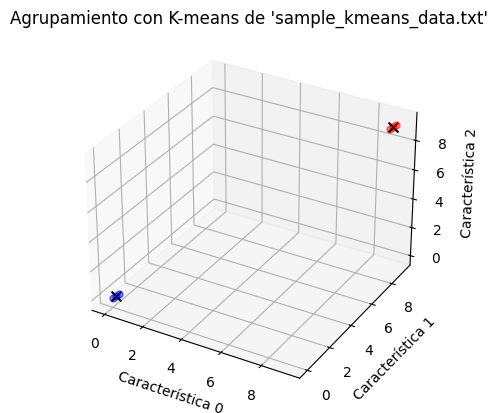

In [ ]:
# VISUALIZACIÓN

# Crear una figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Agrupamiento con K-means de \'sample_kmeans_data.txt\'')
ax.set_xlabel('Característica 0')
ax.set_ylabel('Característica 1')
ax.set_zlabel('Característica 2')

# Graficar los datos coloreados por grupo
for row in predictions.collect():
  if row[2] == 0:
    ax.scatter(row[1][0], row[1][1], row[1][2], c='red', alpha=0.5, s=25)
  else:
    ax.scatter(row[1][0], row[1][1], row[1][2], c='blue', alpha=0.5, s=25)

# Graficar los centros de los grupos
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='black', marker='x', s=50)

# Mostrar la figura
plt.show()

## Conclusión

Como se puede observar en las figuras anteriores, el código logra leer bases de datos conectando el entorno de Colab a una unidad de Google Drive, generar y evaluar modelos de clasificación, regresión y agrupamiento con PySpark y visualizar los resultados con Matplotlib y Seaborn. Adicionalmente, se seleccionaron las mismas bases de datos utilizadas en la documentación de Apache Spark para asegurar un correcto funcionamiento de los modelos. Los gráficos de visualización fueron seleccionados considerando las características de cada modelo y la estructura del código permite ver a simple vista el propósito de cada bloque y de cada línea. Cabe destacar que los gráficos en los bloques de *VISUALIZACIÓN* utilizan la información generada en los bloques de *EVALUACIÓN* para validar que el funcionamiento y los resultados producidos por el modelo sean los deseados.